In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


mean and median are same

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

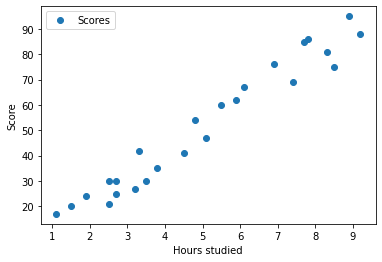

In [7]:
df.plot(x='Hours',y='Scores',style='o')
plt.xlabel('Hours studied')
plt.ylabel('Score')
plt.show()

In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


There is a core relationship between hours and score,we can go ahead and develop a linear regression model.no transformation is required here

In [9]:
df.Scores.values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

prepare the data:
1. No categorical in data so no encoding is required

In [10]:
pip install sklearn

In [11]:
#syntax df.iloc[row_criteria,co_critirea]
#x is gonna have all the features and y is gonna be target
x=df.iloc[:,:-1].values # select all the rows and select all columns as my feature
y=df.iloc[:,1].values #take all the rows and only first column
from sklearn.model_selection import train_test_split #import the required function
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=98)

In [15]:
x_train.shape,y_train.shape

((20, 1), (20,))

In [14]:
x_test.shape,y_test.shape

((5, 1), (5,))

In [16]:
x_train,x_test


(array([[1.1],
        [2.5],
        [8.3],
        [3.2],
        [2.7],
        [7.8],
        [4.5],
        [1.5],
        [3.5],
        [5.5],
        [4.8],
        [8.5],
        [6.1],
        [2.7],
        [1.9],
        [3.8],
        [5.9],
        [7.7],
        [8.9],
        [7.4]]),
 array([[6.9],
        [9.2],
        [3.3],
        [2.5],
        [5.1]]))

Normalising and Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)#finding the values of mu and sigma
x_train=scaler.transform(x_train) # it is nothing but x converted into (x-mu)/sd
x_test=scaler.transform(x_test)#we should not fit the test data


In [19]:
x_train,x_test

(array([[-1.54158402],
        [-0.97586512],
        [ 1.3678275 ],
        [-0.69300566],
        [-0.89504813],
        [ 1.16578503],
        [-0.16769525],
        [-1.37995005],
        [-0.57178018],
        [ 0.23638969],
        [-0.04646977],
        [ 1.44864449],
        [ 0.47884065],
        [-0.89504813],
        [-1.21831608],
        [-0.4505547 ],
        [ 0.39802366],
        [ 1.12537654],
        [ 1.61027846],
        [ 1.00415106]]),
 array([[ 0.80210859],
        [ 1.73150394],
        [-0.65259717],
        [-0.97586512],
        [ 0.07475571]]))

Modelling
# model for algorithm: score=(m*hours)+c


In [20]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train) # all the learning steps are done in this one step-> GD is done and we get best m and c values

LinearRegression()

In [22]:
regressor.intercept_ #c value

50.2

In [24]:
regressor.coef_

#predicted score=24.7*(scalled hours)+50.2

array([24.73888781])

In [25]:
y_pred=regressor.predict(x_test)#given the features of the test dateset, it will give the final predictions
y_pred

array([70.04327451, 93.03548175, 34.05547187, 26.0581824 , 52.04937319])

In [27]:
#compare the true value with predicted value
dt=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
dt

,Actual,Predicted
0,76,70.043275
1,88,93.035482
2,42,34.055472
3,30,26.058182
4,47,52.049373


In [28]:
#if you want to find a student score who study 6 hrs
regressor.predict([[6]])

array([198.63332689])

In [29]:
#for example
regressor.predict([[14]])
#see 396 marks are not possible this is called extrapolation,so you need to see the max and min hrs in data
#the feature value should be in between that only

array([396.5444294])

## Metrics


In [32]:
from sklearn import metrics 
print('Mean Absolute error',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square error',metrics.mean_squared_error(y_test,y_pred))
print('R2-SCORE',metrics.r2_score(y_test,y_pred))

Mean Absolute error 5.585585232537726
Mean Square error 32.99765556754326
R2-SCORE 0.93053710094404


## multiple Linear Regression

In [33]:
data=pd.read_csv('petrol_consumption.csv')
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [35]:
data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [37]:
data.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

In [38]:
data.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [39]:
#data is ready 
data['Petrol_tax'].unique()

array([ 9.  ,  7.5 ,  8.  , 10.  ,  7.  ,  8.5 ,  6.58,  5.  ,  6.  ])

In [ ]:
##plot the data to check linear pattern

Text(0.5, 1.0, 'Petrol_tax vs Petrol_Consumption')

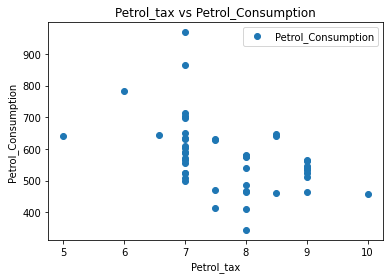

In [49]:
data.plot(x='Petrol_tax',y='Petrol_Consumption',style='o')
plt.xlabel('Petrol_tax')
plt.ylabel('Petrol_Consumption')
plt.title('Petrol_tax vs Petrol_Consumption')

<AxesSubplot:xlabel='Petrol_tax'>

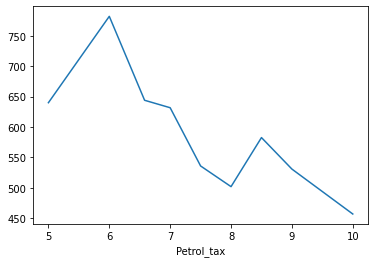

In [43]:
#group the data based on tax and then consumption then take the mean
data.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot()

from plot you cant find here clearly but there is negative correlation linear relationship...lets try with corr

In [45]:
data[['Petrol_tax','Petrol_Consumption']].corr()
#remember if there is >0.2 or <0.2 then there is correlation

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.00000,-0.45128
Petrol_Consumption,-0.45128,1.00000


Text(0.5, 1.0, 'Average_income vs Petrol_Consumption')

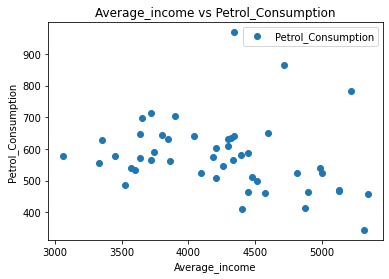

In [50]:
data.plot(x='Average_income',y='Petrol_Consumption',style='o')
plt.xlabel('Average_income')
plt.ylabel('Petrol_Consumption')
plt.title('Average_income vs Petrol_Consumption')

In [47]:
#not clear so go to corr
data[['Average_income','Petrol_Consumption']].corr()

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


Text(0.5, 1.0, 'Paved_Highways vs Petrol_Consumption')

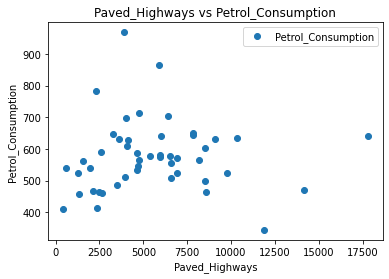

In [51]:
data.plot(x='Paved_Highways',y='Petrol_Consumption',style='o')
plt.xlabel('Paved_Highways')
plt.ylabel('Petrol_Consumption')
plt.title('Paved_Highways vs Petrol_Consumption')

In [52]:
data[['Paved_Highways','Petrol_Consumption']].corr()

,Paved_Highways,Petrol_Consumption
Paved_Highways,1.000000,0.019042
Petrol_Consumption,0.019042,1.000000


,transformed,Petrol_Consumption
transformed,1.000000,0.134113
Petrol_Consumption,0.134113,1.000000


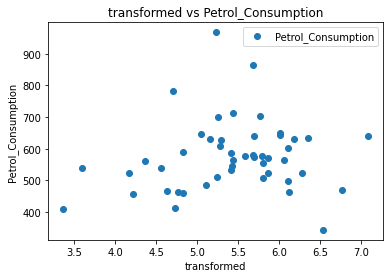

In [59]:
# here there is no linear relationship so we need to transform the variable
data['transformed']=np.power(data['Paved_Highways'],0.2)
data.plot(x='transformed',y='Petrol_Consumption',style='o')
plt.xlabel('transformed')
plt.ylabel('Petrol_Consumption')
plt.title('transformed vs Petrol_Consumption')
data[['transformed','Petrol_Consumption']].corr()

,transformed,Petrol_Consumption
transformed,1.000000,0.165384
Petrol_Consumption,0.165384,1.000000


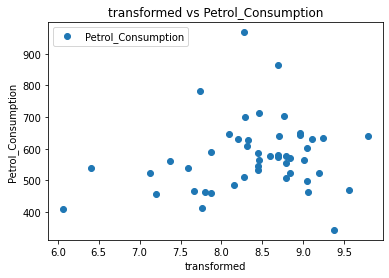

In [60]:
data['transformed']=np.log(data['Paved_Highways'])
data.plot(x='transformed',y='Petrol_Consumption',style='o')
plt.xlabel('transformed')
plt.ylabel('Petrol_Consumption')
plt.title('transformed vs Petrol_Consumption')
data[['transformed','Petrol_Consumption']].corr()

,transformed,Petrol_Consumption
transformed,1.000000,0.151535
Petrol_Consumption,0.151535,1.000000


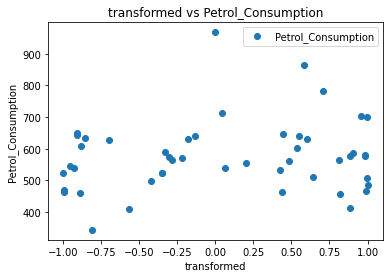

In [61]:
data['transformed']=np.sin(data['Paved_Highways'])
data.plot(x='transformed',y='Petrol_Consumption',style='o')
plt.xlabel('transformed')
plt.ylabel('Petrol_Consumption')
plt.title('transformed vs Petrol_Consumption')
data[['transformed','Petrol_Consumption']].corr()

,cos_paved_highways,Petrol_Consumption
cos_paved_highways,1.000000,-0.237658
Petrol_Consumption,-0.237658,1.000000


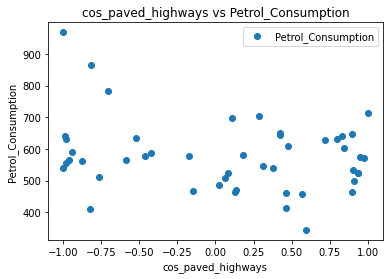

In [63]:
data['cos_paved_highways']=np.cos(data['Paved_Highways'])
data.plot(x='cos_paved_highways',y='Petrol_Consumption',style='o')
plt.xlabel('cos_paved_highways')
plt.ylabel('Petrol_Consumption')
plt.title('cos_paved_highways vs Petrol_Consumption')
data[['cos_paved_highways','Petrol_Consumption']].corr()

In [ ]:
#there is no much correlation so you have 2 options 1.to choose which transform best like log or cos 2.drop the column

,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.698965
Petrol_Consumption,0.698965,1.000000


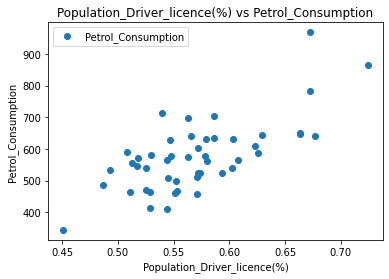

In [64]:
data.plot(x='Population_Driver_licence(%)',y='Petrol_Consumption',style='o')
plt.xlabel('Population_Driver_licence(%)')
plt.ylabel('Petrol_Consumption')
plt.title('Population_Driver_licence(%) vs Petrol_Consumption')
data[['Population_Driver_licence(%)','Petrol_Consumption']].corr()

In [ ]:
#high corr bwn the data so no transformation required

In [65]:
x=data[['Population_Driver_licence(%)','Petrol_tax','Average_income','cos_paved_highways']].values
y=data['Petrol_Consumption'].values

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=90)

In [72]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train,y_train)
x_train_scaled=scalar.transform(x_train)
x_test_scaled=scalar.transform(x_test)

model building

In [73]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [79]:
regressor.intercept_

571.6052631578947

In [78]:
coeff_df=pd.DataFrame(regressor.coef_,columns=['Coefficient'],index=['Population_Driver_licence(%)','Petrol_tax','Average_income','cos_paved_highways'])
coeff_df

,Coefficient
Population_Driver_licence(%),75.345720
Petrol_tax,-21.777971
Average_income,-33.756949
cos_paved_highways,-5.633059


In [ ]:
# it says that
#petrol consumption=75*Population_Driver_licence(%)+(-21)*Petrol_tax+(-33)*Average_income+(-5)*cos_paved_highways+571(which is intecept)
# the main advantegae of scaling is just comparing the coefficient you can tell which is most important feature
#higher the absolute value of coeffcient of feature the more important the feature helps in predicting target
# here it is Population_Driver_liscence